In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Daftar file input dan output
files = [
    {"input": "/content/drive/MyDrive/Dataset/ar/CISI.ALL", "output": "/content/drive/MyDrive/Dataset/ar/CISI_ALL.csv"},
    {"input": "/content/drive/MyDrive/Dataset/ar/CISI.QRY", "output": "/content/drive/MyDrive/Dataset/ar/CISI_QRY.csv"},
    {"input": "/content/drive/MyDrive/Dataset/ar/CISI.REL", "output": "/content/drive/MyDrive/Dataset/ar/CISI_REL.csv"}
]

# Fungsi untuk memproses file
def process_file(input_path, output_path):
    with open(input_path, 'r') as file:
        content = file.readlines()

    data = []
    temp_query = []
    current_id = None

    for line in content:
        line = line.strip()
        if line.startswith(".I"):  # Baris ID
            if current_id is not None and temp_query:
                data.append({"ID": current_id, "Query": " ".join(temp_query)})
            current_id = line.split()[1]
            temp_query = []
        elif line.startswith(".W"):  # Awal teks query
            continue
        else:  # Baris isi query
            temp_query.append(line)

    # Menambahkan data terakhir
    if current_id is not None and temp_query:
        data.append({"ID": current_id, "Query": " ".join(temp_query)})

    # Membuat DataFrame
    df = pd.DataFrame(data)
    # Menyimpan ke file CSV
    df.to_csv(output_path, index=False)
    print(f"File CSV telah disimpan di: {output_path}")

# Proses semua file
for file_info in files:
    process_file(file_info["input"], file_info["output"])


File CSV telah disimpan di: /content/drive/MyDrive/Dataset/ar/CISI_ALL.csv
File CSV telah disimpan di: /content/drive/MyDrive/Dataset/ar/CISI_QRY.csv
File CSV telah disimpan di: /content/drive/MyDrive/Dataset/ar/CISI_REL.csv


In [ ]:
# Import pustaka
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Unduh resource yang dibutuhkan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Baca dataset
file_path = '/content/drive/MyDrive/Dataset/ar/CISI_ALL.csv'
data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dataset
print(data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


   ID                                              Query
0   1  .T 18 Editions of the Dewey Decimal Classifica...
1   2  .T Use Made of Technical Libraries .A Slater, ...
2   3  .T Two Kinds of Power An Essay on Bibliographi...
3   4  .T Systems Analysis of a University Library; f...
4   5  .T A Library Management Game: a report on a re...


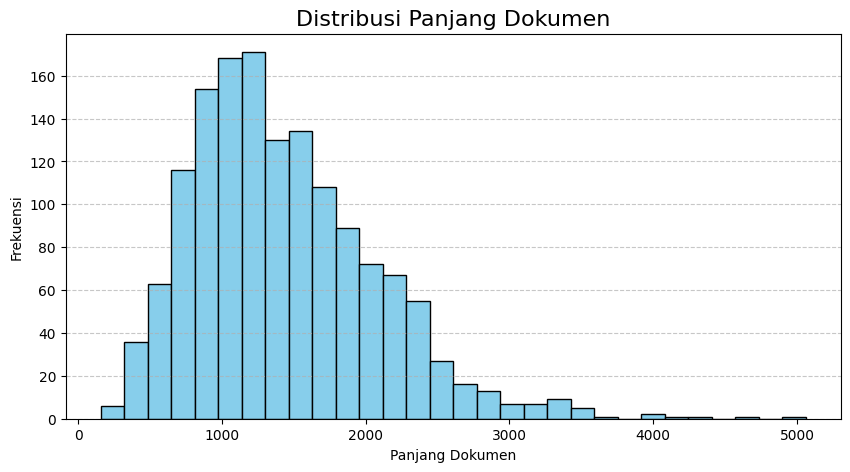

In [ ]:
import matplotlib.pyplot as plt

# Hitung panjang teks untuk setiap dokumen
# Change 'text_column' to 'Query'
data['text_length'] = data['Query'].apply(lambda x: len(str(x)))

# Plot distribusi panjang teks
plt.figure(figsize=(10, 5))
plt.hist(data['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribusi Panjang Dokumen", fontsize=16)
plt.xlabel("Panjang Dokumen")
plt.ylabel("Frekuensi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

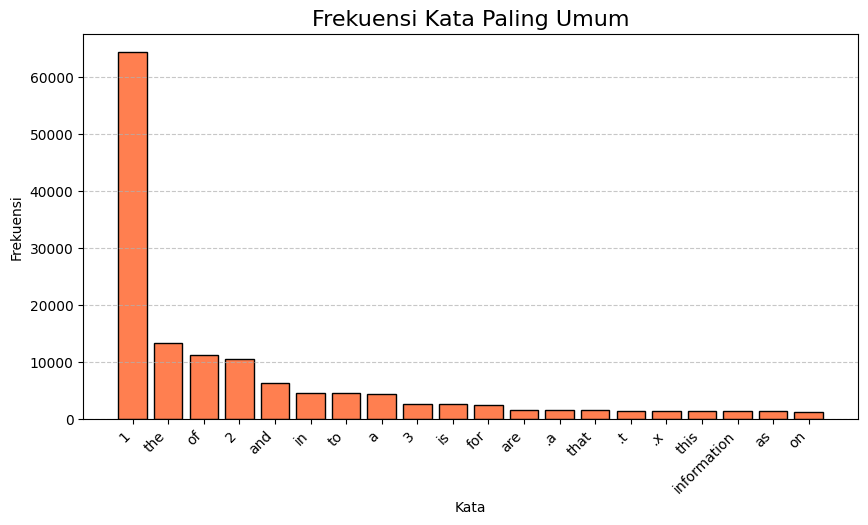

In [ ]:
from collections import Counter

# Gabungkan semua teks dalam dataset
# Change 'text_column' to 'Query' as that's where the actual text data is stored
all_words = ' '.join(data['Query']).lower().split()

# Hitung frekuensi kata
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)  # Top 20 kata paling umum

# Pisahkan kata dan frekuensinya
words, counts = zip(*most_common_words)

# Plot frekuensi kata
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='coral', edgecolor='black')
plt.title("Frekuensi Kata Paling Umum", fontsize=16)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Import pustaka
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Unduh resource yang dibutuhkan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing resource

# Baca dataset
file_path = '/content/drive/MyDrive/Dataset/ar/CISI_ALL.csv'
data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dataset
print(data.head())

# Tokenisasi teks
# Change 'text_column' to 'Query' as that's the actual column name
data['tokenized'] = data['Query'].apply(lambda x: word_tokenize(str(x).lower()))

# Tampilkan hasil tokenisasi untuk beberapa baris
# Change 'text_column' to 'Query' here as well
print(data[['Query', 'tokenized']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


   ID                                              Query
0   1  .T 18 Editions of the Dewey Decimal Classifica...
1   2  .T Use Made of Technical Libraries .A Slater, ...
2   3  .T Two Kinds of Power An Essay on Bibliographi...
3   4  .T Systems Analysis of a University Library; f...
4   5  .T A Library Management Game: a report on a re...
                                               Query  \
0  .T 18 Editions of the Dewey Decimal Classifica...   
1  .T Use Made of Technical Libraries .A Slater, ...   
2  .T Two Kinds of Power An Essay on Bibliographi...   
3  .T Systems Analysis of a University Library; f...   
4  .T A Library Management Game: a report on a re...   

                                           tokenized  
0  [.t, 18, editions, of, the, dewey, decimal, cl...  
1  [.t, use, made, of, technical, libraries, .a, ...  
2  [.t, two, kinds, of, power, an, essay, on, bib...  
3  [.t, systems, analysis, of, a, university, lib...  
4  [.t, a, library, management, game, :, a, re

In [ ]:
# Definisikan stopwords
stop_words = set(stopwords.words('english'))

# Hapus stopwords
data['no_stopwords'] = data['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

# Tampilkan hasil penghapusan stopwords
print(data[['tokenized', 'no_stopwords']].head())


                                           tokenized  \
0  [.t, 18, editions, of, the, dewey, decimal, cl...   
1  [.t, use, made, of, technical, libraries, .a, ...   
2  [.t, two, kinds, of, power, an, essay, on, bib...   
3  [.t, systems, analysis, of, a, university, lib...   
4  [.t, a, library, management, game, :, a, repor...   

                                        no_stopwords  
0  [.t, 18, editions, dewey, decimal, classificat...  
1  [.t, use, made, technical, libraries, .a, slat...  
2  [.t, two, kinds, power, essay, bibliographic, ...  
3  [.t, systems, analysis, university, library, ;...  
4  [.t, library, management, game, :, report, res...  


In [ ]:
# Inisialisasi stemmer
stemmer = PorterStemmer()

# Lakukan stemming
data['stemmed'] = data['no_stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])

# Tampilkan hasil stemming
print(data[['no_stopwords', 'stemmed']].head())


                                        no_stopwords  \
0  [.t, 18, editions, dewey, decimal, classificat...   
1  [.t, use, made, technical, libraries, .a, slat...   
2  [.t, two, kinds, power, essay, bibliographic, ...   
3  [.t, systems, analysis, university, library, ;...   
4  [.t, library, management, game, :, report, res...   

                                             stemmed  
0  [.t, 18, edit, dewey, decim, classif, .a, coma...  
1  [.t, use, made, technic, librari, .a, slater, ...  
2  [.t, two, kind, power, essay, bibliograph, con...  
3  [.t, system, analysi, univers, librari, ;, fin...  
4  [.t, librari, manag, game, :, report, research...  


In [ ]:
# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Lakukan lemmatization
data['lemmatized'] = data['no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Tampilkan hasil lemmatization
print(data[['no_stopwords', 'lemmatized']].head())


                                        no_stopwords  \
0  [.t, 18, editions, dewey, decimal, classificat...   
1  [.t, use, made, technical, libraries, .a, slat...   
2  [.t, two, kinds, power, essay, bibliographic, ...   
3  [.t, systems, analysis, university, library, ;...   
4  [.t, library, management, game, :, report, res...   

                                          lemmatized  
0  [.t, 18, edition, dewey, decimal, classificati...  
1  [.t, use, made, technical, library, .a, slater...  
2  [.t, two, kind, power, essay, bibliographic, c...  
3  [.t, system, analysis, university, library, ;,...  
4  [.t, library, management, game, :, report, res...  


In [ ]:
# Gabungkan kembali kata-kata setelah preprocessing untuk representasi TF-IDF
data['processed_text'] = data['lemmatized'].apply(lambda x: ' '.join(x))

# Representasi TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['processed_text'])

# Tampilkan bentuk matriks TF-IDF
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("TF-IDF Features:", vectorizer.get_feature_names_out())


TF-IDF Matrix Shape: (1460, 11150)
TF-IDF Features: ['00' '000' '029' ... 'zunde' 'zvezhinskii' 'zyabrev']


In [ ]:
# Simpan hasil preprocessing ke file CSV
data.to_csv('/content/drive/MyDrive/Dataset/ar/preprocessed_CISI.csv', index=False)
print("File hasil preprocessing telah disimpan.")


File hasil preprocessing telah disimpan.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

# Contoh label dummy (sesuaikan dengan data asli Anda)
y = [0] * 800 + [1] * 660

# Pastikan jumlah label sesuai dengan jumlah dokumen
assert len(y) == tfidf_matrix.shape[0], "Jumlah label tidak sesuai dengan jumlah dokumen!"

# Bagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Inisialisasi dan pelatihan model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediksi
y_pred = knn.predict(X_test)

# Evaluasi
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.6169295973628444
Recall: 0.6179012345679012
F1-Score: 0.6170559671073619


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Muat label asli dari file CSV
labels_df = pd.read_csv('/content/drive/MyDrive/Dataset/ar/CISI_REL.csv')
#labels_df = pd.read_csv('labels.csv')  # Ganti 'labels.csv' dengan path file Anda
y = labels_df['relevance'].tolist()  # Ganti 'label' dengan nama kolom label

# Pastikan jumlah label sesuai dengan jumlah dokumen
assert len(y) == tfidf_matrix.shape[0], "Jumlah label tidak sesuai dengan jumlah dokumen!"

# Bagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Inisialisasi dan pelatihan model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediksi
y_pred = knn.predict(X_test)

# Evaluasi
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

EmptyDataError: No columns to parse from file

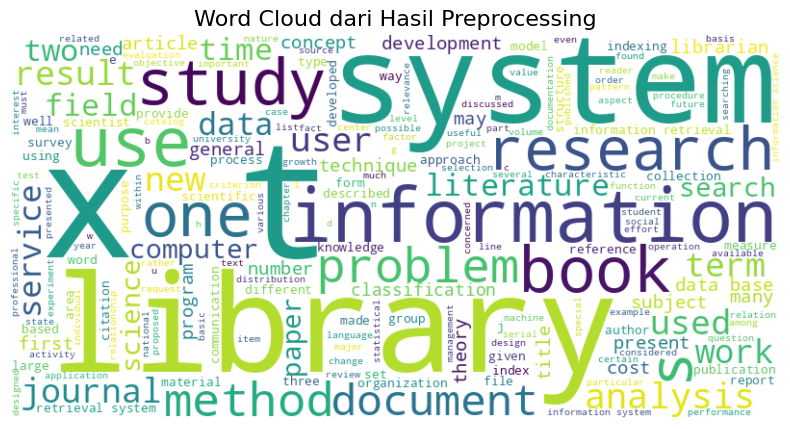

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan teks hasil preprocessing untuk visualisasi Word Cloud
all_text = ' '.join(data['processed_text'])

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Visualisasi Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud dari Hasil Preprocessing", fontsize=16)
plt.show()


# Model **KNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

y = [0] * 800 + [1] * 660

# Ensure the number of labels matches the number of documents
assert len(y) == tfidf_matrix.shape[0], "Jumlah label tidak sesuai dengan jumlah dokumen!"

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # K=5
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluasi KNN
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print("=== Model KNN ===")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-Score: {f1_knn}")

# Confusion Matrix KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - KNN")
plt.show()

NameError: name 'tfidf_matrix' is not defined

# Model Logistic **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Muat dataset label
labels_df = pd.read_csv('/content/drive/MyDrive/Dataset/ar/CISI_REL.csv')

# Gabungkan label dengan data
merged_data = pd.merge(data, labels_df, on='document_id', how='left')

# Buat variabel label
y = merged_data['relevance'].tolist()

# Ensure the number of labels matches the number of documents
assert len(y) == tfidf_matrix.shape[0], "Jumlah label tidak sesuai dengan jumlah dokumen!"

# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Model Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluasi Logistic Regression
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')

print("=== Model Logistic Regression ===")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1-Score: {f1_logreg}")

# Confusion Matrix Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

EmptyDataError: No columns to parse from file

=== Model SVM ===
Precision: 0.7002200220022002
Recall: 0.6728395061728395
F1-Score: 0.6718281718281718


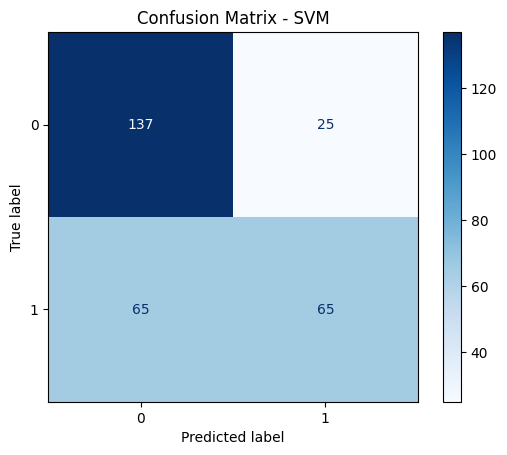

In [ ]:
from sklearn.svm import SVC

# Model SVM
svm = SVC(kernel='linear', random_state=42)  # Anda bisa mengganti 'linear' dengan kernel lain seperti 'rbf' jika diperlukan
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluasi SVM
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print("=== Model SVM ===")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-Score: {f1_svm}")

# Confusion Matrix SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SVM")
plt.show()


=== Model Random Forest ===
Precision: 0.6769639934533551
Recall: 0.6642924976258309
F1-Score: 0.6648595848595849


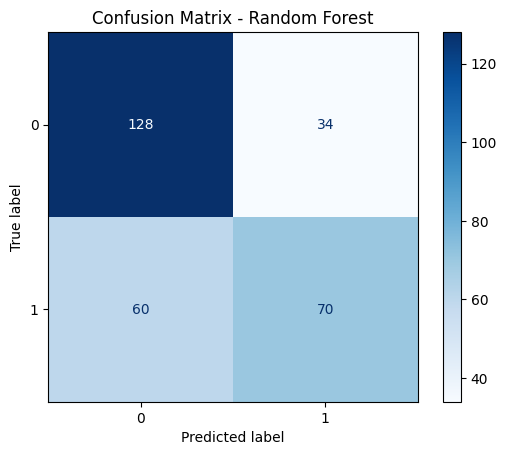

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators dapat disesuaikan
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluasi Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print("=== Model Random Forest ===")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")

# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
# Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# Contoh kueri
query = "information retrieval system evaluation"

# Preprocessing query sama seperti pada data training
query_tokenized = word_tokenize(query.lower())
query_no_stopwords = [word for word in query_tokenized if word not in stop_words]
query_stemmed = [stemmer.stem(word) for word in query_no_stopwords]
query_lemmatized = [lemmatizer.lemmatize(word) for word in query_stemmed]
query_processed = ' '.join(query_lemmatized)

# Transform query menggunakan TF-IDF vectorizer yang sama
query_vec = vectorizer.transform([query_processed])

# Prediksi kelas query menggunakan model KNN
predicted_class = knn.predict(query_vec)[0]

# Filter dokumen berdasarkan kelas yang diprediksi
filtered_data = data[y == predicted_class]
filtered_tfidf_matrix = tfidf_matrix[y == predicted_class]

# Hitung kesamaan kosinus antara query dan dokumen yang difilter
cosine_similarities = cosine_similarity(query_vec, filtered_tfidf_matrix).flatten()

# Dapatkan dokumen dengan skor tertinggi
top_k = 10  # Jumlah dokumen yang ingin diambil
top_k_indices = cosine_similarities.argsort()[-top_k:][::-1]

# Tampilkan dokumen yang relevan
print("Dokumen paling relevan:")
for idx in top_k_indices:
    document_index = filtered_data.index[idx]  # Dapatkan index asli dokumen
    print(f"Dokumen {document_index+1}: {data['Query'][document_index]} - Skor: {cosine_similarities[idx]}")

Dokumen paling relevan:
Dokumen 1136: .T Data Retrieval Systems:  Specifics and Problems .A Shtein, V. S. The essential differences between data retrieval system and document retrieval systems are considered.. The notion of "fact" is discussed, analyzing the influence of the definition adopted on the structure of a data retrieval system.. A proposition is advanced that a factographic JRS is a rudimentary but indispensable form on the way to a logical information system.. The latter type of system by a capability for automatic analysis of input data and synthesis of new information.. The problem of the information retrieval language for data retrieval system is discussed, as is its machine organization, intricately tied up with the specifics and functions of a system of that kind.. .X 179	1	1136 1136	5	1136 1163	1	1136 1326	2	1136 1460	1	1136 1460	1	1136 - Skor: 0.07045462061531937
Dokumen 1236: .T Public Libraries in Cooperative Systems; Administrative patterns for service .A Gregory, 

In [ ]:
# Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# Contoh kueri
query = "information retrieval system evaluation"

# Preprocessing query sama seperti pada data training
query_tokenized = word_tokenize(query.lower())
query_no_stopwords = [word for word in query_tokenized if word not in stop_words]
query_stemmed = [stemmer.stem(word) for word in query_no_stopwords]
query_lemmatized = [lemmatizer.lemmatize(word) for word in query_stemmed]
query_processed = ' '.join(query_lemmatized)

# Transform query menggunakan TF-IDF vectorizer yang sama
query_vec = vectorizer.transform([query_processed])

# Prediksi kelas query menggunakan model SVM
predicted_class = svm.predict(query_vec)[0]

# Filter dokumen berdasarkan kelas yang diprediksi
filtered_data = data[y == predicted_class]
filtered_tfidf_matrix = tfidf_matrix[y == predicted_class]

# Hitung kesamaan kosinus antara query dan dokumen yang difilter
cosine_similarities = cosine_similarity(query_vec, filtered_tfidf_matrix).flatten()

# Dapatkan dokumen dengan skor tertinggi
top_k = 10  # Jumlah dokumen yang ingin diambil
top_k_indices = cosine_similarities.argsort()[-top_k:][::-1]

# Tampilkan dokumen yang relevan
print("Dokumen paling relevan:")
for idx in top_k_indices:
    document_index = filtered_data.index[idx]  # Dapatkan index asli dokumen
    print(f"Dokumen {document_index+1}: {data['Query'][document_index]} - Skor: {cosine_similarities[idx]}")


Dokumen paling relevan:
Dokumen 538: .T Information Retrieval Systems .A Lancaster, F.W. .B 1972 This book is concerned primarily with those "intellectual" factors that significantly affect the performance of all information retrieval systems; namely, - indexing policy and practice - vocabulary control - searching control - interaction between the system and its users My viewpoint is that of the evaluator of information systems.  I have therefore paid considerable attention to a discussion of the requirements of users of information systems and the measurement of system performance in terms of the efficient and economical satisfaction of these requirements. The book does not concern itself, except indirectly, with equipment for the implementation of retrieval systems, a topic that is adequately covered by other volumes in this series.  Moreover, it is my contention that the importance of "hardware" and "data processing" aspects of information systems has been exaggerated in the United 

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
import pandas as pd

# ... (Your existing code to load and preprocess data) ...

# Assuming 'data' contains your preprocessed text data
# If not, you'll need to load and preprocess your data here

# Representasi TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['processed_text']) # Define tfidf_matrix

# Assuming 'y' contains your target labels (as defined earlier in your code)
# If 'y' is not available, create it based on your dataset's structure.
y = [0] * 800 + [1] * 660  # Label dummy; sesuaikan sesuai dataset

# Ensure the number of labels matches the number of documents
assert len(y) == tfidf_matrix.shape[0], "Jumlah label tidak sesuai dengan jumlah dokumen!"

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Model SVM
svm = SVC(kernel='linear', random_state=42)  # Anda bisa mengganti 'linear' dengan kernel lain seperti 'rbf' jika diperlukan
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# ... (Rest of your code for evaluation and confusion matrix) ...

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Asumsikan 'y' berisi label Anda (seperti yang didefinisikan sebelumnya di kode Anda)
# Jika 'y' tidak tersedia, buatlah berdasarkan struktur dataset Anda.
y = [0] * 800 + [1] * 660  # Label dummy; sesuaikan sesuai dataset

# Pastikan jumlah label sesuai dengan jumlah dokumen
assert len(y) == tfidf_matrix.shape[0], "Jumlah label tidak sesuai dengan jumlah dokumen!"

# Bagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Buat DataFrame untuk data training dan testing
train_df = pd.DataFrame(X_train.toarray())  # Konversi sparse matrix ke array
train_df['label'] = y_train
test_df = pd.DataFrame(X_test.toarray())
test_df['label'] = y_test

# Unduh data training dan testing ke file CSV
train_df.to_csv('/content/drive/MyDrive/Dataset/ar/train_data.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/Dataset/ar/test_data.csv', index=False)

print("Data training dan testing telah diunduh ke file CSV.")

Data training dan testing telah diunduh ke file CSV.


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Asumsikan 'y' berisi label Anda (seperti yang didefinisikan sebelumnya di kode Anda)
# Jika 'y' tidak tersedia, buatlah berdasarkan struktur dataset Anda.
y = [0] * 800 + [1] * 660  # Label dummy; sesuaikan sesuai dataset

# Pastikan jumlah label sesuai dengan jumlah dokumen
assert len(y) == tfidf_matrix.shape[0], "Jumlah label tidak sesuai dengan jumlah dokumen!"

# Bagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Buat DataFrame untuk data training dan testing
train_df = pd.DataFrame(X_train.toarray())  # Konversi sparse matrix ke array
train_df['label'] = y_train  # Menggunakan kolom 'label' untuk menyimpan label
test_df = pd.DataFrame(X_test.toarray())
test_df['label'] = y_test  # Menggunakan kolom 'label' untuk menyimpan label

# Unduh data training dan testing ke file CSV
train_df.to_csv('/content/drive/MyDrive/Dataset/ar/train_data.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/Dataset/ar/test_data.csv', index=False)

print("Data training dan testing telah diunduh ke file CSV.")

Data training dan testing telah diunduh ke file CSV.
